## Tier 1. Module 2: Mathematics for Computer Science
## Topic 10 - Decision-making methods
## Final assignment

Given the input [data set](https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit#gid=1986277343) from [Kaggle](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency?resource=download), it is necessary to process it and solve the problem of predicting the quality of sleep.

### Part 1. Data analysis and preparation

* Analyze ranges of values, their averages and variances, distributions, correlations, presence of missing values, types of features.
* Check for missing values. If available, fill them in or issue lines with passes.
* In the presence of binary signs, the value of these signs is replaced by 0 and 1.
* Analyze signs of multicollinearity (Variance inflation factor).
* Analyze the importance of features.

#### 1.1 - Data import and visualization

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = "https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit#gid=1986277343"
url = url[: url.find("/edit")] + "/export?format=csv"

df = pd.read_csv(url)

In [127]:
df.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


In [128]:
df.shape

(452, 15)

In [129]:
nan_counts = df.isna().sum()
nan_counts

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

The data is a 452x15 CSV table. The data contains gaps (NaN) in the columns "Awakening", "Caffeine consumption", "Alcohol consumption", "Exercise frequency" and binary data "Yes/No" in the column "Smoking status" and "Male/Female" in the column "Gender".

There are relatively few gaps in the stacks, and they can be replaced by column averages without significantly distorting the input data.

#### 1.2 - Replacement of blanks with average column values

In [130]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.000000,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.000000,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,23.653396,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.000000,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.000000,0.0,No,1.0


In [131]:
nan_counts = df.isna().sum()
nan_counts

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

#### 1.3 - Checking data types in each column

In [132]:
data_types = df.dtypes
data_types

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

The sleep and wake-up time in the table contains not only the time, but also the date, which we do not need for analysis. Additionally, binary characters are denoted by string type values. It is necessary to change the format of this data to a numerical one, in order to simplify its analysis with the help of machine algorithms.

#### 1.4 - Replacement of binary signs with 0 and 1

In [133]:
df.replace("Yes", 1, inplace=True)
df.replace("No", 0, inplace=True)
df.replace("Male", 1, inplace=True)
df.replace("Female", 0, inplace=True)
df.tail()

C:\Users\danie\AppData\Local\Temp\ipykernel_40744\2579763630.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("No", 0, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_40744\2579763630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Female", 0, inplace=True)


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.000000,0.0,0,5.0
448,449,52,1,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.000000,0.0,0,3.0
449,450,40,0,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,23.653396,3.0,1,0.0
450,451,45,1,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.000000,0.0,0,3.0
451,452,18,1,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.000000,0.0,0,1.0


#### 1.5 - Conversion of columns with time data

The DateTime object is converted to a float type, where only the hours from 0 to 23 are represented, and then the beginning of the day is shifted to the 21st hour so that there is no gap in the time intervals.

In [134]:
df['Bedtime'] = pd.to_datetime(df['Bedtime']).apply(lambda x: (x.hour + x.minute / 60 - 21) % 24)
df['Wakeup time'] = pd.to_datetime(df['Wakeup time']).apply(lambda x: (x.hour + x.minute / 60 - 21) % 24)
df.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,0,1.0,8.5,7.5,0.91,22,57,21,0.0,0.000000,0.0,0,5.0
448,449,52,1,0.0,6.0,6.0,0.74,28,57,15,4.0,25.000000,0.0,0,3.0
449,450,40,0,2.0,10.5,8.5,0.55,20,32,48,1.0,23.653396,3.0,1,0.0
450,451,45,1,0.0,7.0,7.0,0.76,18,72,10,3.0,0.000000,0.0,0,3.0
451,452,18,1,5.5,13.0,7.5,0.63,22,23,55,1.0,50.000000,0.0,0,1.0


In [135]:
data_types = df.dtypes
data_types

ID                          int64
Age                         int64
Gender                      int64
Bedtime                   float64
Wakeup time               float64
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object

#### 1.6 - Removal of unnecessary information

The 'ID' column is not required for data analysis.

In [136]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,4.0,10.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,1,5.0,12.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,0,0.5,8.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,5.5,11.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,1,4.0,12.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


The table is ready for preliminary data analysis.

#### 1.7 - Multicollinearity analysis

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

print(vif_data)

                   Feature         VIF
0                      Age    1.152335
1                   Gender    1.267567
2                  Bedtime         inf
3              Wakeup time         inf
4           Sleep duration         inf
5         Sleep efficiency    5.101836
6     REM sleep percentage   48.718475
7    Deep sleep percentage  113.932769
8   Light sleep percentage   18.323645
9               Awakenings    1.751138
10    Caffeine consumption    1.105847
11     Alcohol consumption    1.229921
12          Smoking status    1.271401
13      Exercise frequency    1.286044


C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


As can be seen from the results of the collinearity test, the bedtime, the wakeup time, and the sleep duration are interdependent characteristics, one of which must be excluded in order not to distort the results of the regression model (do not count the same value twice). There is also a high correlation between sleep phases, one of them also needs to be removed.

#### 1.8 - Mean values and distribution of data

In [138]:
df.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,2.636062,10.101770,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,0.340708,1.791480
std,13.172250,0.500534,1.687559,1.955899,0.866625,0.135237,3.525963,15.654235,15.313665,1.326338,29.353745,1.596013,0.474472,1.418603
min,9.000000,0.000000,0.000000,6.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,8.500000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,3.000000,10.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,23.653396,0.000000,0.000000,2.000000
75%,52.000000,1.000000,4.000000,12.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,5.500000,15.500000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


It is interesting to note that the mean value in the "Gender" column was slightly above 0.5, which means that there are slightly more men than women in the sample. At the same time, the average "Smoking status" is 0.34, that is, only a third of smokers. On average, respondents go to bed at 11:00 p.m. sleep 7 and a half hours, consume little alcohol and caffeine, exercise twice a week.

#### 1.9 - Distribution histograms

C:\Users\danie\AppData\Local\Temp\ipykernel_40744\2016394633.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


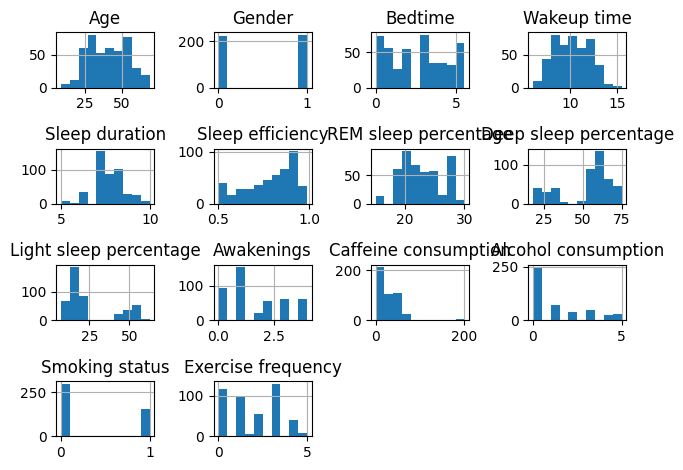

In [139]:
fig, ax = plt.subplots()
df.hist(ax=ax)
fig.tight_layout()
plt.show()

#### 1.10 - Data correlation with sleep efficiency

In [140]:
df.corr()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Age,1.000000,0.244468,0.136799,0.090355,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017468,-0.168273,0.046474,0.031237,0.071892
Gender,0.244468,1.000000,0.031442,0.007466,-0.044376,0.010062,-0.161102,0.075939,-0.040534,0.074205,-0.242839,0.058287,0.143020,0.230169
Bedtime,0.136799,0.031442,1.000000,0.897138,0.077487,-0.140665,-0.079307,-0.091077,0.111363,0.099268,-0.004032,0.013589,0.216126,-0.313931
Wakeup time,0.090355,0.007466,0.897138,1.000000,0.509939,-0.133537,-0.075489,-0.095111,0.114607,0.087789,-0.009922,-0.008507,0.188340,-0.300948
Sleep duration,-0.062462,-0.044376,0.077487,0.509939,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004829,-0.014542,-0.045662,0.004211,-0.067903
Sleep efficiency,0.098357,0.010062,-0.140665,-0.133537,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.554498,0.063121,-0.383671,-0.290026,0.257974
REM sleep percentage,0.042091,-0.161102,-0.079307,-0.075489,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.024992,0.058018,-0.051709,0.032184,0.031165
Deep sleep percentage,0.021730,0.075939,-0.091077,-0.095111,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.300301,0.001683,-0.355842,-0.226802,0.178281
Light sleep percentage,-0.031905,-0.040534,0.111363,0.114607,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312734,-0.015079,0.375662,0.224436,-0.189422
Awakenings,-0.017468,0.074205,0.099268,0.087789,0.004829,-0.554498,-0.024992,-0.300301,0.312734,1.000000,-0.103769,0.198491,-0.020781,-0.212485


<Axes: >

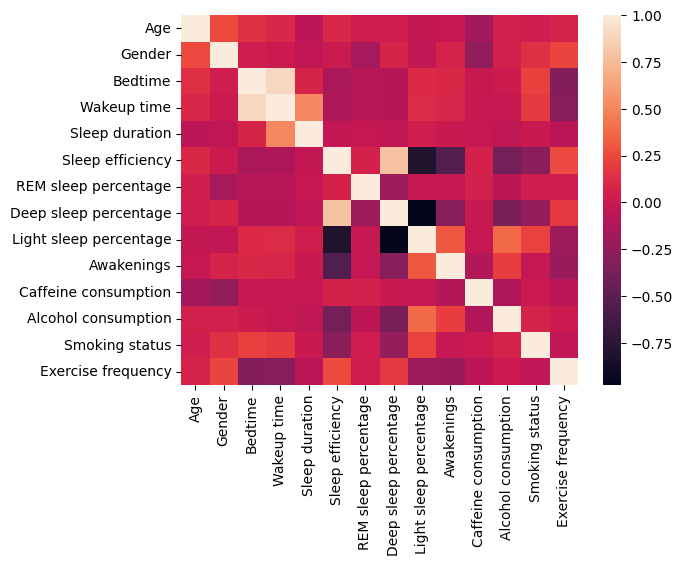

In [141]:
sns.heatmap(df.corr())

Sleep quality correlates well with the duration of deep sleep and has a strong inverse correlation with the duration of light sleep. In turn, deep sleep and light sleep have a correlation between them that approaches -1, obviously, these are mutually exclusive things, and the columns are collinear. One of them needs to be removed so as not to overload the model.

In addition, the time of awakening is the sum of the time of falling asleep and the duration of sleep, it should also be removed in order not to count the same symptom twice.

Thus, based on the above correlations, the most important characteristic of sleep quality is the duration of deep sleep (correlation coefficient 0.79), the time of awakening has a much smaller effect (inverse correlation -0.55), alcohol consumption, smoking and exercise. have a partial effect (correlation coefficients from 0.25 to 0.38).

#### 1.11 - Removal of collinear features

In [142]:
df.drop(columns=['Light sleep percentage'], inplace=True)
df.drop(columns=['Wakeup time'], inplace=True)
df.head()

,Age,Gender,Bedtime,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,4.0,6.0,0.88,18,70,0.0,0.0,0.0,1,3.0
1,69,1,5.0,7.0,0.66,19,28,3.0,0.0,3.0,1,3.0
2,40,0,0.5,8.0,0.89,20,70,1.0,0.0,0.0,0,3.0
3,40,0,5.5,6.0,0.51,23,25,3.0,50.0,5.0,1,1.0
4,57,1,4.0,8.0,0.76,27,55,3.0,0.0,3.0,0,3.0


In [143]:
df.shape

(452, 12)

### Part 2. Modeling

* Create at least 2 different regression models to predict the target variable “Sleep efficiency”.
* Rate the quality of the models by at least 2 metrics.
* Find optimal values of model parameters, for example, using the GridSearch algorithm.

#### 2.1 - Feature matrix and result vector

Data mixing

In [144]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42)

The final vector of sleep efficiency

In [145]:
y = df_shuffled["Sleep efficiency"]
y.shape

(452,)

Feature matrix

In [146]:
X = df_shuffled.drop(columns=["Sleep efficiency"], inplace=False)
X.shape

(452, 11)

#### 2.2 - Division of data into training and validation data

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(361, 11) (91, 11) (361,) (91,)


#### 2.3 - Summary of the model

Metrics

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def error_metrics(y_pred):
    """
    Function to print Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
    and R-squared metrics basing on prediction made by a model

    :param y_pred: predicted values
    :return: None, function only prints required metrics
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)

Visualization of actual and predicted values

In [149]:
def plotter(y_pred, name):
    """
    Function to make a scatter plot with actual and predicted values for their
    visual comparison

    :param y_pred: predicted values
    :param name: name of the regressor that made prediction
    :return: None, function only prints required metrics
    """
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted values")
    plt.scatter(y_test, y_test, alpha=0.5, color="red", label="Actual values")
    plt.xlabel("Actual values (y_test)")
    plt.ylabel("Predicted values (y_pred)")
    plt.title(f"Actual vs. Predicted values by {name}")
    plt.legend()
    plt.show()

Biggest deviations

In [150]:
def show_deviations(y_pred, num):
    """
    Function to compare n best predictions with n worst predictions made by a model

    :param y_pred: predicted values
    :param num: the number of best and worst predictions to consider
    :return: None, function only prints required metrics
    """
    devs = abs(y_test - y_pred)
    devs = devs.rename("Deviations")
    new_df = pd.concat([X_test, devs], axis=1)
    sorted_df = new_df.sort_values(by="Deviations", ascending=False)
    average_first_5_rows = sorted_df.iloc[:num].mean()
    average_last_5_rows = sorted_df.iloc[-num:].mean()
    print(f"Deviation in % between the mean of the {num} best and worst predictions:")
    print((average_first_5_rows - average_last_5_rows) / average_last_5_rows * 100)
    return sorted_df

Visualization of residuals

In [151]:
def residuals_plot(y_pred, name):
    """
    Function to plot residuals of the prediction

    :param y_pred: predicted values
    :param name: name of the regressor that made prediction
    :return: None, function only prints required metrics
    """
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='green', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals Plot (Test Set): {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

#### 2.4 - Linear Regression

Model training

In [152]:
from sklearn.linear_model import LinearRegression


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

Model check

In [153]:
error_metrics(y_pred_lr)

Mean Absolute Error: 0.04948546214310964
Mean Squared Error: 0.003996182457926185
Root Mean Squared Error: 0.06321536567897226
R-squared: 0.7942458467637764


C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 2.5 - K-Nearest Neighbor Regression

In [154]:
from sklearn.neighbors import KNeighborsRegressor

model_kn = KNeighborsRegressor(n_neighbors=5)
model_kn.fit(X_train, y_train)

y_pred_kn = model_kn.predict(X_test)

In [155]:
error_metrics(y_pred_kn)

Mean Absolute Error: 0.05731868131868133
Mean Squared Error: 0.005123868131868133
Root Mean Squared Error: 0.07158119956991593
R-squared: 0.7361839305721529


C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


k-nearest-neighbor regression performs slightly worse than ordinary linear regression.

#### 2.6 - Random Forest Regression

In [156]:
from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [157]:
error_metrics(y_pred_rf)

Mean Absolute Error: 0.03517491803274973
Mean Squared Error: 0.0018663866494667753
Root Mean Squared Error: 0.043201697298448534
R-squared: 0.9039040862834591


C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random forest regression showed the most accurate results for all metrics.

#### 2.7 - Optimization of the best model

Based on the above indicators, Random Forest Regressor turned out to be the most accurate model. Let's try to optimize its parameters using GridSearch.

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_rf_new = RandomForestRegressor(random_state=42)

# Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model_rf_new, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 0.0027033328173465135


In [173]:
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)

In [174]:
error_metrics(y_pred_rf_best)

Mean Absolute Error: 0.03892112244897952
Mean Squared Error: 0.002306663314336171
Root Mean Squared Error: 0.048027734844943194
R-squared: 0.8812352633947059


C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model proposed by the algorithm turned out to be slightly worse than the standard random forest model with a depth of 5. From this, we can conclude that complicating the model does not always lead to its improvement.

### Part 3. Analysis of results

* For all models, construct graphs comparing actual and predicted data.
* Draw conclusions on which examples each model is more wrong.
* Compare the quality of models. Write conclusions.
* Build residuals plot.

#### 3.1 - Linear Regression

Visualization of predicted values

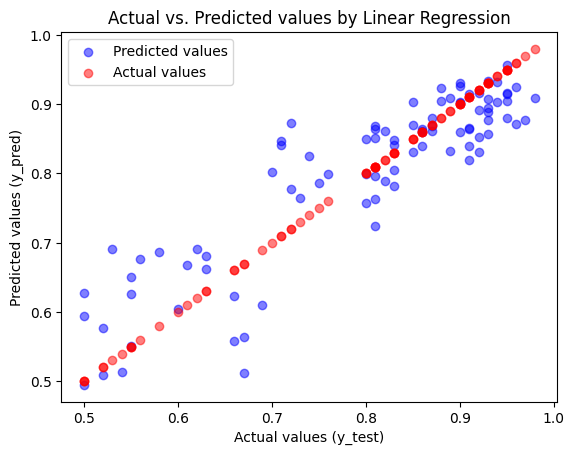

In [161]:
plotter(y_pred_lr, "Linear Regression")

Visualization of residuals

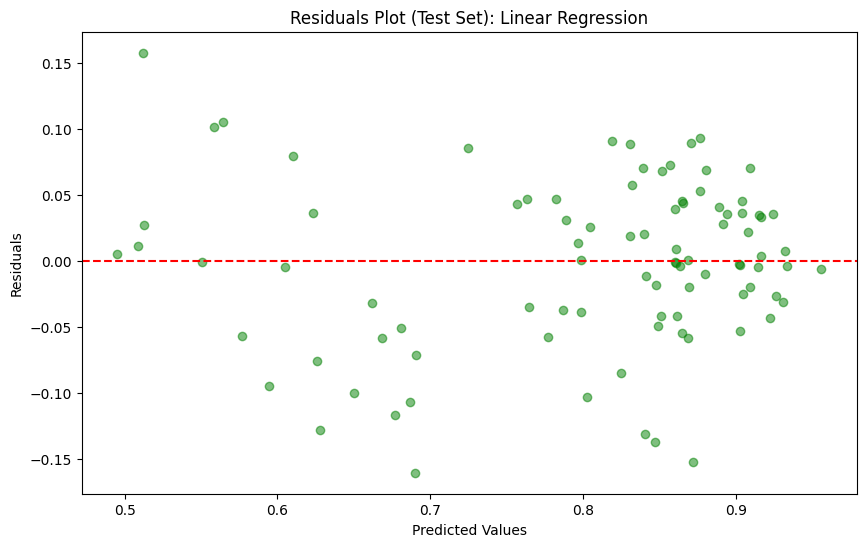

In [162]:
residuals_plot(y_pred_lr, "Linear Regression")

Analysis of the largest deviations of predicted values

In this case, the "average subject" in the ten worst predictions is compared to the "average subject" in the ten best predictions made by the linear regressor. As you can see, the biggest difference between the two is alcohol consumption and waking up on time. Obviously, this model does not take these parameters into account.

In [163]:
X_sorted_lr = show_deviations(y_pred_lr, 10)
X_sorted_lr

Deviation in % between the mean of the 10 best and worst predictions:
Age                         3.676471
Gender                     25.000000
Bedtime                    30.769231
Sleep duration              3.333333
REM sleep percentage       -4.000000
Deep sleep percentage     -27.195946
Awakenings                 75.000000
Caffeine consumption      -40.000000
Alcohol consumption       200.000000
Smoking status              0.000000
Exercise frequency        -23.076923
Deviations               6454.147234
dtype: float64


,Age,Gender,Bedtime,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Deviations
364,37,1,3.5,8.0,30,25,1.0,0.0,0.0,1,3.0,0.160235
394,55,0,5.0,8.0,20,30,4.0,50.0,5.0,1,0.0,0.157856
369,41,1,4.5,6.0,20,70,2.0,25.0,1.0,0,1.0,0.152292
51,65,1,5.5,7.5,22,59,2.0,50.0,2.0,0,3.0,0.137176
201,64,0,5.0,8.0,23,58,2.0,50.0,0.0,0,0.0,0.130737
...,...,...,...,...,...,...,...,...,...,...,...,...
80,55,1,4.5,8.5,20,67,1.0,25.0,0.0,1,1.0,0.001146
59,34,0,0.0,7.5,28,60,4.0,50.0,0.0,0,1.0,0.001011
116,50,1,3.5,8.0,28,57,1.0,50.0,0.0,1,3.0,0.000869
198,32,0,4.5,5.0,20,65,1.0,25.0,1.0,0,0.0,0.000581


Model parameters

In [164]:
print("Coefficients:", model_lr.coef_)
print("Intercept:", model_lr.intercept_)

Coefficients: [ 0.0005457   0.00890756  0.00090071  0.00155916  0.00704486  0.00554475
 -0.03501723  0.0001692  -0.00603226 -0.04709852  0.00362632]
Intercept: 0.3667831601729759


#### 3.2 - K-Nearest Neighbor Regression

Visualization of predicted values

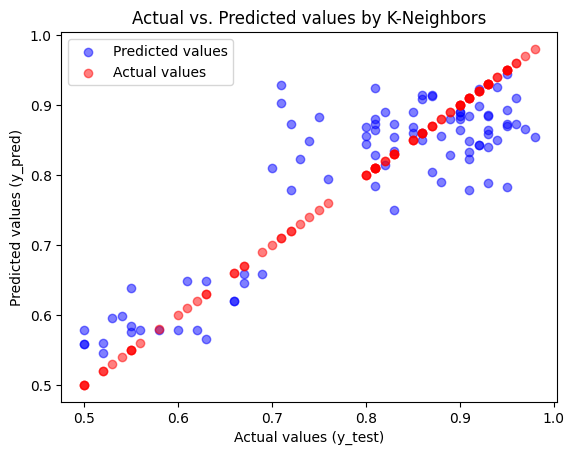

In [165]:
plotter(y_pred_kn, "K-Neighbors")

Visualization of residuals

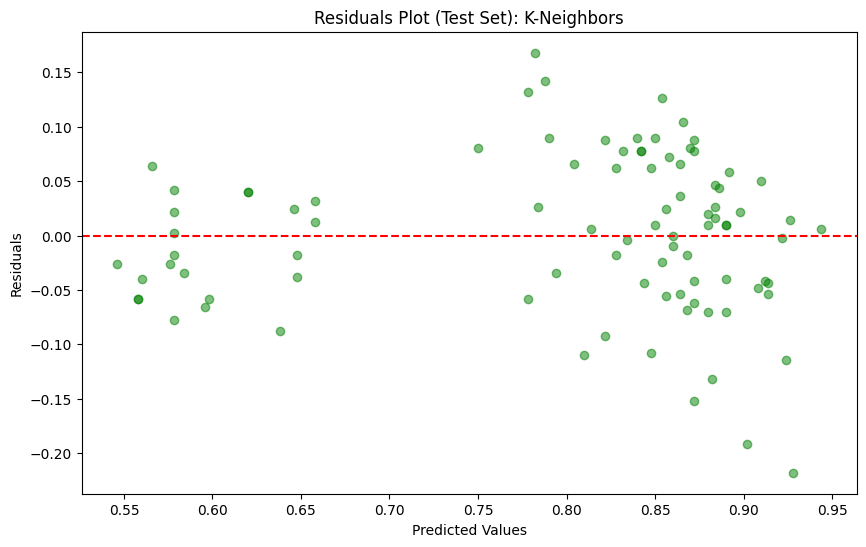

In [166]:
residuals_plot(y_pred_kn, "K-Neighbors")

Analysis of the largest deviations of predicted values

In this case, the "average subject" in the ten worst predictions is compared to the "average subject" in the ten best predictions made by the 5-nearest-neighbor regressor. As you can see, the biggest difference between the two is the smoking status and wake up time. Obviously, this model does not take these parameters into account.

In [167]:
X_sorted_kn = show_deviations(y_pred_kn, 10)
X_sorted_kn

Deviation in % between the mean of the 10 best and worst predictions:
Age                        27.851459
Gender                     20.000000
Bedtime                    20.634921
Sleep duration             -2.097902
REM sleep percentage       -0.934579
Deep sleep percentage       5.804312
Awakenings                148.651924
Caffeine consumption      -36.853311
Alcohol consumption       -41.666667
Smoking status           -100.000000
Exercise frequency        -22.727273
Deviations               2376.666667
dtype: float64


,Age,Gender,Bedtime,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Deviations
201,64,0,5.0,8.0,23,58,2.000000,50.0,0.0,0,0.0,2.180000e-01
51,65,1,5.5,7.5,22,59,2.000000,50.0,2.0,0,3.0,1.920000e-01
174,48,0,1.5,8.0,20,70,1.000000,0.0,0.0,0,4.0,1.680000e-01
369,41,1,4.5,6.0,20,70,2.000000,25.0,1.0,0,1.0,1.520000e-01
122,48,1,3.0,7.0,22,58,1.000000,0.0,0.0,0,0.0,1.420000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
225,60,1,4.0,8.0,22,58,3.000000,0.0,3.0,0,3.0,6.000000e-03
138,55,1,5.5,7.5,23,58,1.641204,0.0,3.0,0,3.0,4.000000e-03
361,27,0,3.0,6.0,25,63,0.000000,75.0,0.0,1,2.0,2.000000e-03
219,13,0,4.0,8.0,18,37,1.000000,0.0,0.0,0,0.0,2.000000e-03


Model parameters

In [168]:
print("Number of neighbors (k):", model_kn.n_neighbors)
print("Weight function:", model_kn.weights)
print("Distance metric:", model_kn.metric)

Number of neighbors (k): 5
Weight function: uniform
Distance metric: minkowski


#### 3.3 - Random forest regression

Visualization of predicted values

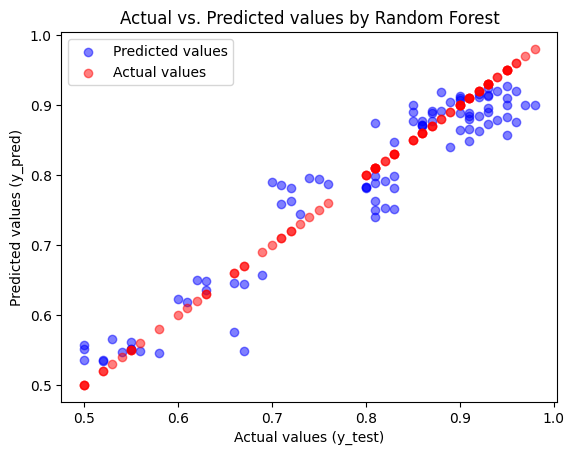

In [175]:
plotter(y_pred_rf, "Random Forest")

Visualization of residuals

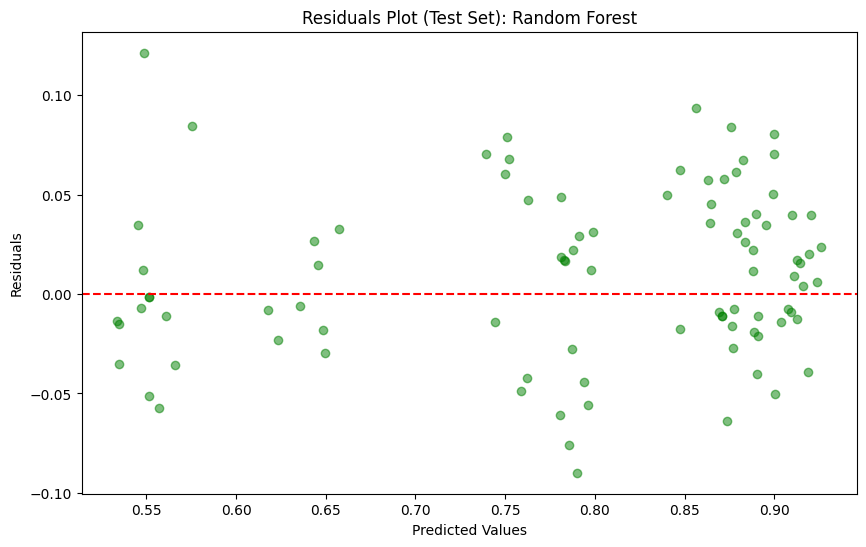

In [176]:
residuals_plot(y_pred_rf, "Random Forest")

Analysis of the largest deviations of predicted values

In this case, the "average subject" in the ten worst predictions is compared to the "average subject" in the ten best predictions made by the random forest regressor. As you can see, the biggest difference between them is gender and waking time. Obviously, this model does not take these parameters into account.

In [177]:
X_sorted_rf = show_deviations(y_pred_rf, 10)
X_sorted_rf

Deviation in % between the mean of the 10 best and worst predictions:
Age                        29.974811
Gender                    100.000000
Bedtime                    30.645161
Sleep duration             -1.960784
REM sleep percentage        2.232143
Deep sleep percentage      17.362637
Awakenings                 72.727273
Caffeine consumption      -20.108312
Alcohol consumption        -5.903457
Smoking status            -20.000000
Exercise frequency         38.461538
Deviations               1380.027839
dtype: float64


,Age,Gender,Bedtime,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Deviations
394,55,0,5.0,8.0,20,30,4.0,50.000000,5.0,1,0.0,0.121425
164,48,1,5.0,8.0,20,70,1.0,23.653396,0.0,1,3.0,0.093807
153,41,1,5.5,7.5,22,59,3.0,0.000000,0.0,0,3.0,0.089863
1,69,1,5.0,7.0,19,28,3.0,0.000000,3.0,1,3.0,0.084503
218,56,0,4.0,7.0,28,52,1.0,50.000000,0.0,0,0.0,0.084174
...,...,...,...,...,...,...,...,...,...,...,...,...
277,48,0,0.5,8.0,25,60,0.0,25.000000,0.0,0,4.0,0.006102
396,57,0,4.5,7.0,28,18,1.0,50.000000,1.0,0,1.0,0.005794
363,30,0,4.5,10.0,22,65,0.0,25.000000,1.0,0,0.0,0.004218
266,24,1,3.0,7.0,20,32,3.0,0.000000,3.0,1,0.0,0.001352


Model parameters

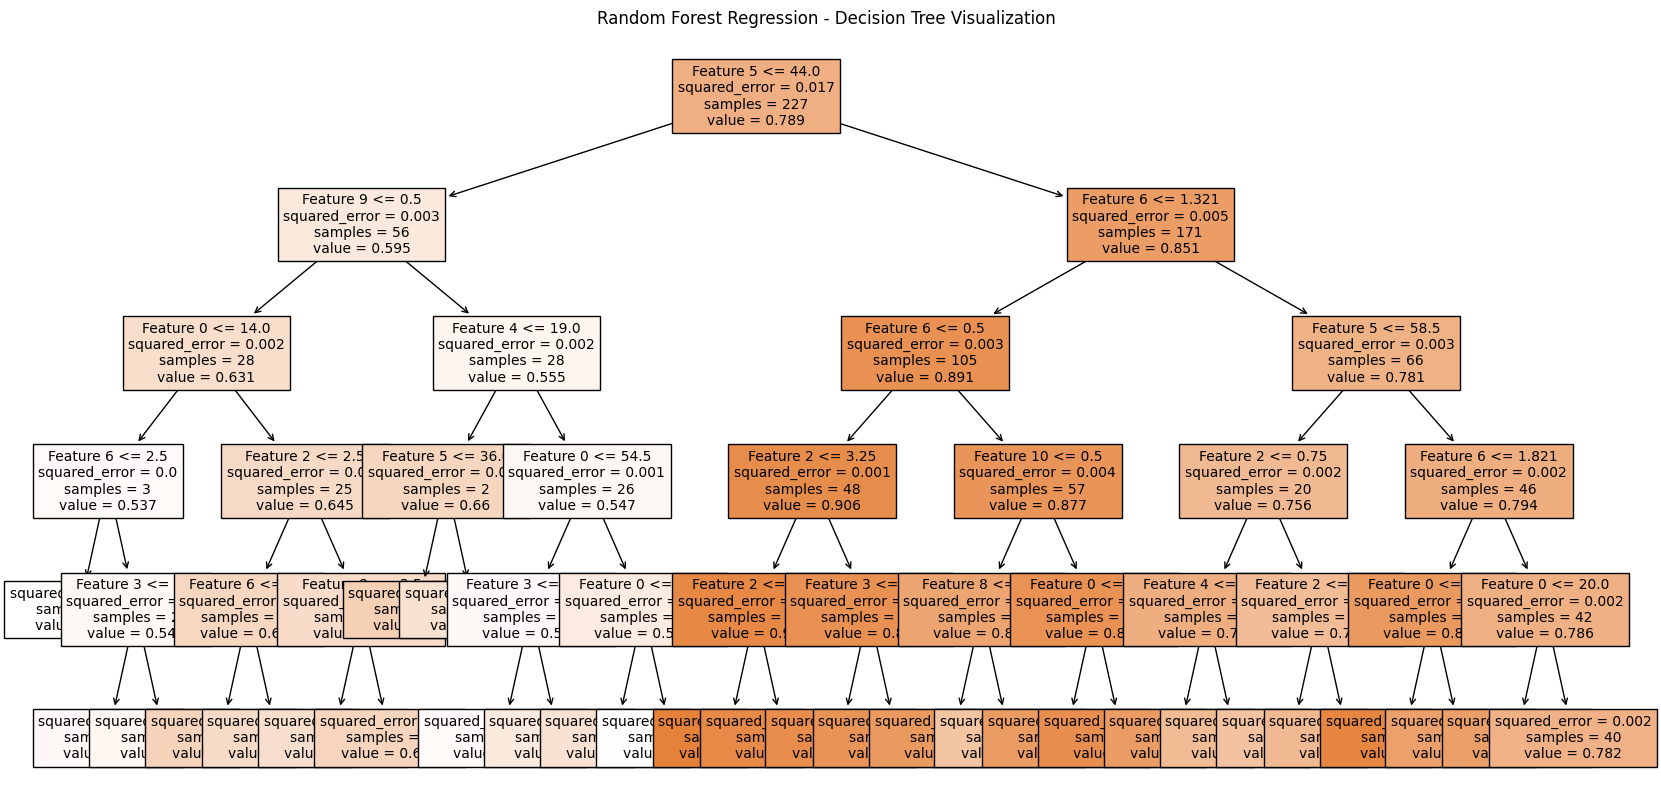

In [178]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_rf.estimators_[0], filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], fontsize=10)
plt.title("Random Forest Regression - Decision Tree Visualization")
plt.show()

### Conclusions:

Based on the study carried out, it can be established that the model based on the random forest regressor coped best with the task of predicting the quality of sleep. It has both the lowest error (-40% MAE and RMSE compared to the linear regressor and -60% compared to K nearest neighbors) and the smallest variation from best to worst prediction.